# Cosmic Watch Desktop Muon Detector Plotting Notebook


The premise of this notebook is to plot data provided to the user from the cosmic ray detectors. These plots will allow a user to better visuallize the data that the cosmic ray detectors provide.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# fileName = "10 MIN RAD RUN//DETECTOR 5 - 10 MIN RAD RUN.TXT" # RELATIVE PATH OF THE CHOSEN DATA SET 
fileName = '24 HR RUNS//DETECTOR 2 - 24 HR RUN.TXT'

# print("""How was the txt file aquired?
#     1 - SD Card
#     2 - import_data.py - Record data on the computer
#     3 - import_data.py - Copy Datq files from SD card to your computer
#     4 - import_data.py - Connect to server: www.cosmicwatch.lns.mit.edu""")


# userInput = int(input("Selected output: ")) # Gather input from user


# if userInput == 1: # The main method of moving data from a detector to a computer
#     filePD = pd.read_csv(fileName, skiprows = 6, names = ['Entry','ArdTime','ADC', 'SiPM', 'Deadtime', 'Temp'], lineterminator='\n', sep='\s+', encoding = 'unicode_escape', engine ='python')

# elif userInput == 2: # This input will gather data from the detector directly into a file
#     filePD = pd.read_csv(fileName, skiprows = 23, names = ['Comp_date', 'Comp_time', 'Entry','ArdTime','ADC', 'SiPM', 'Deadtime', 'Temp'], lineterminator='\n', sep='\s+', encoding = 'unicode_escape', engine ='python')

# elif userInput == 3: # This input will gather data from the files already collected on the SD card in the detector
#     filePD = pd.read_csv(fileName, skiprows = 19, names = ['Entry','ArdTime','ADC', 'SiPM', 'Deadtime', 'Temp'], lineterminator='\n', sep='\s+', encoding = 'unicode_escape', engine ='python')

# elif userInput == 4: # This input will gather data from the file saved from the website www.cosmicwatch.lns.mit.edu 
#     filePD = pd.read_csv(fileName, names = ['Comp_date', 'Comp_time', 'Entry','ArdTime','ADC', 'SiPM', 'Deadtime'], lineterminator='\n', sep='\s+', encoding = 'unicode_escape', engine ='python')
# else:
#     print("No proper file format was provided")
#     exit()

filePD = pd.read_csv(fileName, skiprows = 6, names = ['Entry','ArdTime','ADC', 'SiPM', 'Deadtime', 'Temp'], lineterminator='\n', sep='\s+', encoding = 'unicode_escape', engine ='python')


filePD.ArdTime = filePD.ArdTime/1000 # converting the ArdTime column from milliseconds to seconds

filePD.Deadtime = filePD.Deadtime/1000 # converting the Deadtime column from milliseconds to seconds


print(len(filePD.ADC))
filePD = filePD.drop(np.where(np.array(filePD.ADC)>500)[0])
print(len(filePD.ADC))


164093
160781


# SiPM Voltage Histogram

Text(0, 0.5, 'Events')

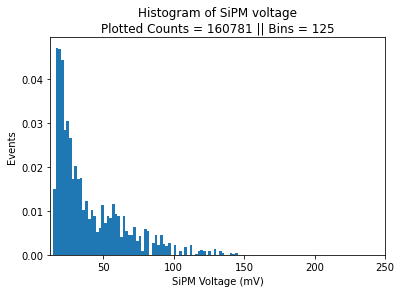

In [ ]:
''' ADJUSTABLE VARIABLES '''

x_min = 12.5 # Minimum range of the histogram 

x_max = 200 # Maximum range of the histogram 

bin = 110 # Number of histogram bins 

density = False # True: Normallized plot || False: Non-normallized plot

x_range = [x_min, x_max] # Histogram plot range

x_label = 'SiPM Voltage (mV)' # label for the x axis

y_label = 'Events' # label for the y axis


''' CALCULATIONS '''

SiPM_array = np.array(filePD.SiPM) # Numpy array of all SiPM values

occurrence_number = len(SiPM_array[(SiPM_array >= x_min) & (SiPM_array <= x_max)]) # Get the number of occurrences within the plot range


''' PLOTTING CODE '''

plt.figure() # Begin figure setup

histogramPlot = plt.hist(filePD.SiPM, bins = bin, range = x_range, density = True) # Calling the histogram matplotlib function and providing the spreadsheet column in use and the number of bins we will use

plt.title('Histogram of SiPM voltage\nPlotted Counts = %d || Bins = %i' % (occurrence_number, bin)) # Setting the title of the plot
# plt.title('Histogram of SiPM Voltage') # Setting the title of the plot

plt.xlim(x_range) # the graph's domain 

plt.xlabel(x_label) # x axis label

plt.ylabel(y_label) # y axis label

# Histogram of Occurrence Time

(0.0, 600.053)

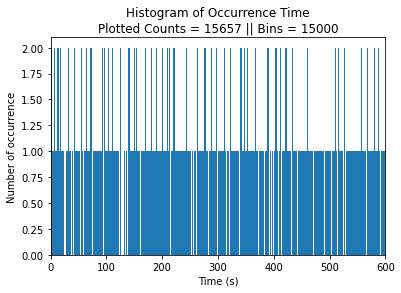

In [3]:
''' ADJUSTABLE VALUES '''

x_min = 0 # Minimum range of the histogram

x_max = filePD.ArdTime.array[-1] # Maximum range of the histogram

bins = 15000 # Number of histogram bins

density = False # True: Normallized plot || False: Non-normallized plot

x_range = [x_min, x_max] # Histogram plot range

x_label = 'Time (s)' # label for the x axis

y_label = 'Occurrences' # label for the y axis


''' CALCULATIONS '''

ardtime_array = np.array(filePD.ArdTime) # Numpy array of entry time values

occurrence_number = len(ardtime_array[(ardtime_array >= x_min) & (ardtime_array <= x_max)]) # Get the number of occurrences within the plot range


''' PLOTTING CODE '''

plt.figure()

plt.hist(filePD.ArdTime, bins, range = x_range, density = density) # establish the histogram plot

plt.title("Histogram of Occurrence Time\nPlotted Counts = %i || Bins = %i" % (occurrence_number, bins)) # Title of the plot

plt.xlabel("Time (s)") # x axis label

plt.ylabel("Number of occurrence") # y axis label

plt.xlim(x_range) # the graph's domain

# Occurrence's SiPM Voltage Plotted as a Function of the Recorded ADC Reading

Text(0.5, 0, 'ADC (Analog to Digital Converter)')

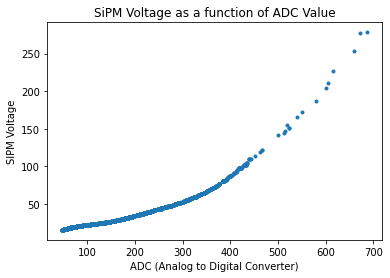

In [4]:
''' PLOTTING CODE '''
plt.figure() 

plt.plot(filePD.ADC, filePD.SiPM,  '.') # Plotting information

plt.title("SiPM Voltage as a function of ADC Value") # plot title

plt.ylabel('SIPM Voltage') # y axis label
plt.xlabel('ADC (Analog to Digital Converter)') # x axis label

# Histogram Displaying the Deadtime Between Occurrences

Text(0, 0.5, 'Occurrences')

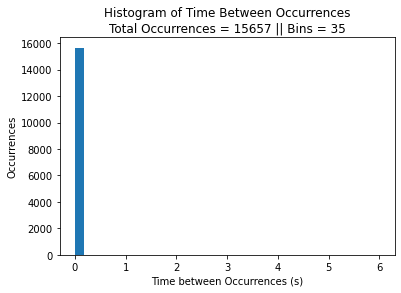

In [5]:
''' ADJUSTABLE VARIABLES '''

x_min = 0 # Minimum range of the histogram 

x_max = 6 # Maximum range of the histogram 

bins = 35 # Number of histogram bins 

density = False # True: Normallized plot || False: Non-normallized plot

x_range = [x_min, x_max] # Histogram plot range

x_label = "Time between Occurrences (s)" # label for the x axis

y_label = 'Occurrences' # label for the y axis


''' CALCULATIONS '''

timeDelta_array = np.array([]) # creating an array to store the calculated time deltas

time_initial = 0 # setting the initial time

for i in filePD.ArdTime.array: # for each loop to go through the elements of filePD.ArdTime.array
    
    timeDelta = i - time_initial # finding the time delta between the initial time and the element of the ArdTime array

    timeDelta_array = np.append(timeDelta_array, timeDelta) # Appending the time delta to the timeDelta_array array

    time_initial = i # setting the new initial time to the previous 

occurrence_number = len(timeDelta_array[(timeDelta_array >= x_min) & (timeDelta_array <= x_max)]) # Get the number of occurrences within the plot range


''' PLOTTING CODE '''

plt.hist(timeDelta_array, bins= bins, range = x_range, density = density) # Histogram plot

plt.title("Histogram of Time Between Occurrences\nTotal Occurrences = %i || Bins = %i" % (occurrence_number, bins)) # Setting the plot title

plt.xlabel(x_label) # x axis label

plt.ylabel(y_label) # y axis label



# Rate Calculation and Uncertainty

In [6]:
''' RATE CALCULATION '''

slope, intercept = np.polyfit(filePD.ArdTime, filePD.Entry, 1) # Rate Calculation


''' UNCERTIANTY CALCULATION '''

N = np.array(filePD.Entry)[-1] # The number of counts made over the course of the run

total_deadtime = np.array(filePD.Deadtime)[-1] # The total time that the arduino was incapable of making measurements

total_time = np.array(filePD.ArdTime)[-1] # The total time of the run 

uncertainty = np.sqrt(N)/(total_time-total_deadtime) # uncertainty rate calculation  


''' OUTPUT '''

print('The rate of detections was found to be %f +- %f counts/second' % (slope, uncertainty)) # output statement


The rate of detections was found to be 26.018245 +- 0.530799 counts/second



# Average Rate Plotted as a Function of Time


Text(0, 0.5, 'Average Rate (counts/s)')

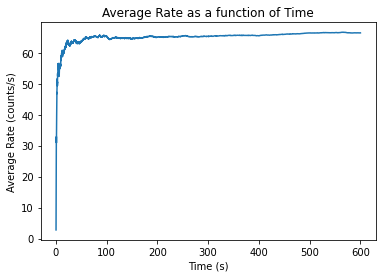

In [7]:
''' ADJUSTABLE VALUES '''

x_min = 0 # Minimum range of the plot

x_max = 10000 # Maximum range of the plot

x_range = [x_min, x_max] # Histogram plot range

x_label = 'Time (s)' # label for the x axis

y_label = 'Average Rate (counts/s)' # label for the y axis


''' CALCULATIONS '''

rate_avg_array = np.array([]) # Establish the list the obtained values will be stored within

for i in range(len(filePD.ArdTime)): # For loop that will run for each of the total entries

    rate_avg = filePD.Entry.array[i] / (filePD.ArdTime.array[i] - filePD.Deadtime.array[i]) # calculating the average rate at the time of each occurrence

    rate_avg_array = np.append(rate_avg_array, rate_avg) # appending the new calculated average rate to the pre constructed array


''' PLOTTING CODE '''

plt.figure()

plt.plot(filePD.ArdTime.array, rate_avg_array) # Establish the line plot

plt.title("Average Rate as a function of Time") # setting the title of the plot

plt.xlabel(x_label) # x label

plt.ylabel(y_label) # y label

In [13]:
# print(filePD)
# filePD = filePD.drop(np.where(np.array(filePD.ADC)>500)[0])
# print(filePD)
print(filePD)
indexNames = filePD[(filePD['ADC'] > 200) ].index
filePD.drop(indexNames, inplace=True)

print(filePD)

         Entry    ArdTime  ADC   SiPM  Deadtime   Temp
0            1      0.904  112  22.94     0.000  17.35
2            3      1.307  152  26.78     0.034  17.35
3            4      1.678  167  28.76     0.053  17.35
4            5      2.525  134  24.82     0.072  17.35
5            6      2.886   51  15.86     0.096  17.35
...        ...        ...  ...    ...       ...    ...
164088  164089  86427.289  399  87.30  3355.810  20.90
164089  164090  86429.099  142  25.64  3355.830  20.90
164090  164091  86429.269  145  25.96  3355.850  20.90
164091  164092  86429.351  166  28.62  3355.870  20.90
164092  164093  86429.549  188  32.01  3355.890  20.90

[160781 rows x 6 columns]
         Entry    ArdTime  ADC   SiPM  Deadtime   Temp
0            1      0.904  112  22.94     0.000  17.35
2            3      1.307  152  26.78     0.034  17.35
3            4      1.678  167  28.76     0.053  17.35
4            5      2.525  134  24.82     0.072  17.35
5            6      2.886   51  15.86 

Fitting 1 distributions: 100%|██████████| 1/1 [00:05<00:00,  5.32s/it]


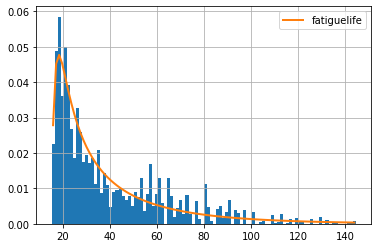

In [12]:
from fitter import Fitter

f = Fitter(filePD.SiPM, distributions=['fatiguelife']) # Test 106 distributions on the SiPM dataframe

f.fit() # fit the best ones to a plot
f.summary() # Plots the best distributions

f.get_best(method = 'sumsquare_error') # Find the best distribution out of the 106 distribuitions plotted

params = f.fitted_param["fatiguelife"] # get the parameters of the best distribution


126


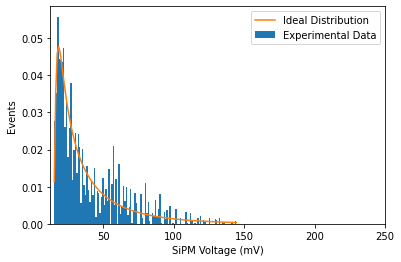

In [26]:

import numpy as np
from scipy.optimize import curve_fit

from scipy import stats, integrate

import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions, get_distributions




# d = 200



histogramPlot = plt.hist(filePD.SiPM, bins = bin , density = True, label = 'Experimental Data') # Calling the histogram matplotlib function and providing the spreadsheet column in use and the number of bins we will use

voltage = histogramPlot[1]
print(len(voltage))
idealDist = stats.fatiguelife.pdf(voltage, *params)

plt.plot(voltage, idealDist, label = 'Ideal Distribution')

plt.xlabel('SiPM Voltage (mV)')
plt.ylabel('Events')
plt.legend()
plt.savefig('original.jpg')
plt.xlim(x_range) # the graph's domain 

plt.show()


plt.show()





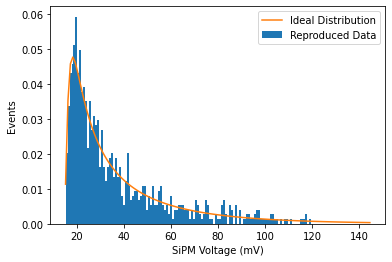

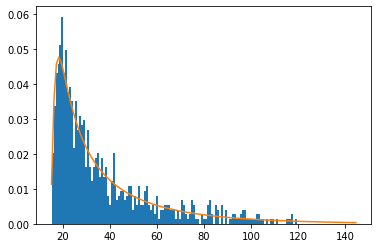

In [30]:
import numpy as np
from scipy.optimize import curve_fit

from scipy import stats

import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions, get_distributions



d = len(voltage)

# Array to be used for storing values
voltageArr = np.array([]) 

# Initialize the loop variables
i = 0 
# N = 10000

# while i < N:
while i < 100000:

    # Get a random voltage between ~17 and 200
    randVoltage = np.random.uniform(voltage[0], d)

    # Find the probability of getting this exact voltage using the fatiguelife PDF
    prob = stats.fatiguelife.pdf(randVoltage, *params) 

    # Roll a value between 0 and 1 and check if the rolled value is below the proababily of finding the voltage
    # if the rolled value is lower append the voltage to an array to be plotted later
    if prob > np.random.rand(): 
        voltageArr = np.append(voltageArr, randVoltage)

    i += 1 # update the loop variable 

plt.hist(voltageArr, bins = bin, density = True, label= 'Reproduced Data')
plt.plot(voltage, idealDist, label = 'Ideal Distribution')
plt.xlabel('SiPM Voltage (mV)')
plt.ylabel('Events')
plt.legend()
# plt.xlim(x_range) # the graph's domain 
plt.savefig('wooooo.jpg')

plt.show()


        


plt.hist(voltageArr, bins = bin, density = True)
plt.plot(voltage, idealDist)




In [ ]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)
# Fixing bin edges
HIST_BINS = np.linspace(-4, 4, 100)

# histogram our data with numpy
data = np.random.randn(1000)
n, _ = np.histogram(data, HIST_BINS)


def prepare_animation(bar_container):

    def animate(frame_number):
        # simulate new data coming in
        data = np.random.randn(1000)
        n, _ = np.histogram(data, HIST_BINS)
        for count, rect in zip(n, bar_container.patches):
            rect.set_height(count)
        return bar_container.patches
    return animate




fig, ax = plt.subplots()
_, _, bar_container = ax.hist(data, HIST_BINS, lw=1,
                              ec="yellow", fc="green", alpha=0.5)
ax.set_ylim(top=55)  # set safe limit to ensure that all data is visible.

ani = animation.FuncAnimation(fig, prepare_animation(bar_container), 50,
                              repeat=False, blit=True)
plt.show()

RuntimeError: Requested MovieWriter (ffmpeg) not available

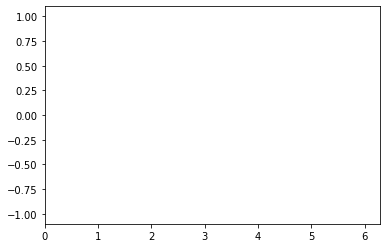

In [25]:
import numpy as np
from matplotlib.animation import FuncAnimation, FFMpegWriter
from IPython import display
import matplotlib.pyplot as plt


Figure = plt.figure()
 
# creating a plot
lines_plotted = plt.plot([])    
 
# putting limits on x axis since
# it is a trigonometry function
# (0,2∏)
line_plotted = lines_plotted[0]
 
plt.xlim(0,2*np.pi) 
 
# putting limits on y since it is a
# cosine function
plt.ylim(-1.1,1.1)   
 
# initialising x from 0 to 2∏
x = np.linspace(0,2*np.pi,100)  
 
#initially
y = 0

# function takes frame as an input
def AnimationFunction(frame):
 
    # setting y according to frame
    # number and + x. It's logic
    y = np.cos(x+2*np.pi*frame/100)
 
    # line is set with new values of x and y
    line_plotted.set_data((x, y))

anim_created = FuncAnimation(Figure, AnimationFunction, frames=100, interval=25)

# FFwriter = FFMpegWriter()
video = anim_created.to_html5_video()
html = display.HTML(video)
display.display(html)
 
# good practice to close the plt object.
plt.close()




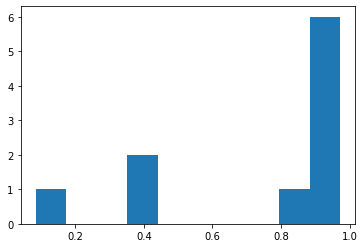

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

n = 100
number_of_frames = 10
data = np.random.rand(n, number_of_frames)

def update_hist(num, data):
    plt.cla()
    plt.hist(data[num])

fig = plt.figure()
hist = plt.hist(data[0])

animation = animation.FuncAnimation(fig, update_hist, number_of_frames, fargs=(data, ) )

plt.show()

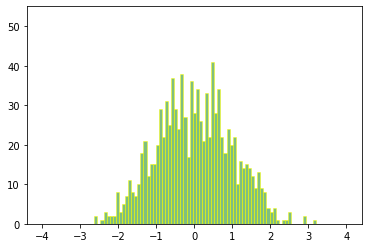

In [20]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)
# Fixing bin edges
HIST_BINS = np.linspace(-4, 4, 100)

# histogram our data with numpy
data = np.random.randn(1000)
n, _ = np.histogram(data, HIST_BINS)

def prepare_animation(bar_container):

    def animate(frame_number):
        # simulate new data coming in
        data = np.random.randn(1000)
        n, _ = np.histogram(data, HIST_BINS)
        for count, rect in zip(n, bar_container.patches):
            rect.set_height(count)
        return bar_container.patches
    return animate

fig, ax = plt.subplots()
_, _, bar_container = ax.hist(data, HIST_BINS, lw=1,
                              ec="yellow", fc="green", alpha=0.5)
ax.set_ylim(top=55)  # set safe limit to ensure that all data is visible.

ani = animation.FuncAnimation(fig, prepare_animation(bar_container), 50, repeat=False, blit=True)

plt.show()